https://github.com/FUlyankin/matstat-AB/blob/main/week01_intro/data/youtube_data.csv - данные
## Описательные статистики и pandas

In [69]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# для отображения всех стобцов
pd.options.display.max_columns = None

In [83]:
df = pd.read_csv(r'F:\Загрузки\youtube_data.csv', sep='\t')

In [6]:
df.shape

(19124, 30)

In [7]:
df.head(2)

,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
0,"""#2Маши ""Свободные линии""",False,10,34.0,hd,ITUNES - https://itun.es/ru/0YzI_,43.0,PT3M30S,youtube,True,...,59.44,8.84,0.63541,0.48,24.0,9.0,1.0,0.32,0.0,0.0
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",False,10,NaN,sd,NEW OFFICIAL VIDEO\r\n2010,690.0,PT3M42S,youtube,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# pd.Series состоит из двух сущностей: индекс + значение колонки
df.dislikeCount

0           43.0
1          690.0
2           10.0
3            7.0
4           19.0
          ...   
19119        0.0
19120      431.0
19121    15494.0
19122       10.0
19123        0.0
Name: dislikeCount, Length: 19124, dtype: float64

In [9]:
df.dislikeCount.values

array([4.3000e+01, 6.9000e+02, 1.0000e+01, ..., 1.5494e+04, 1.0000e+01,
       0.0000e+00])

In [10]:
df.dislikeCount.index

RangeIndex(start=0, stop=19124, step=1)

In [11]:
# максимальное значение дизлайков
df['dislikeCount'].max()

640698.0

In [12]:
# пропуски игнорирует
df['dislikeCount'].mean()

745.3442970822281

In [13]:
# пропуски не игнорирует
np.mean(df.dislikeCount.values, )

nan

In [14]:
# фильтрация
mx = df['dislikeCount'].max()
df['dislikeCount'] == mx

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Name: dislikeCount, Length: 19124, dtype: bool

In [15]:
# фильтруем значения True
df[df['dislikeCount'] == mx]

,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
1299,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),False,10,303077.0,hd,STREAM:\nhttps://lnk.to/faceislove\n\nFOLLOW:\...,640698.0,PT2M24S,youtube,True,...,49.057,8.227,0.480086,0.21,1541.0,565.0,1.008,0.0875,587.0,856.0


### Меры центральной тенденции

In [16]:
df['dislikeCount'].mean()

745.3442970822281

In [17]:
df['dislikeCount'].median()

5.0

In [18]:
df['dislikeCount'].mode()

0    0.0
Name: dislikeCount, dtype: float64

<Axes: >

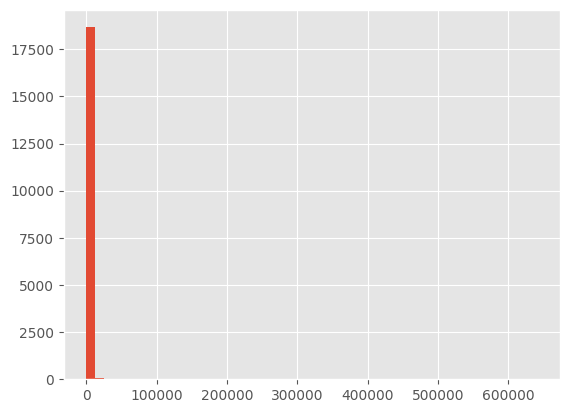

In [51]:
df['dislikeCount'].hist(bins=50)

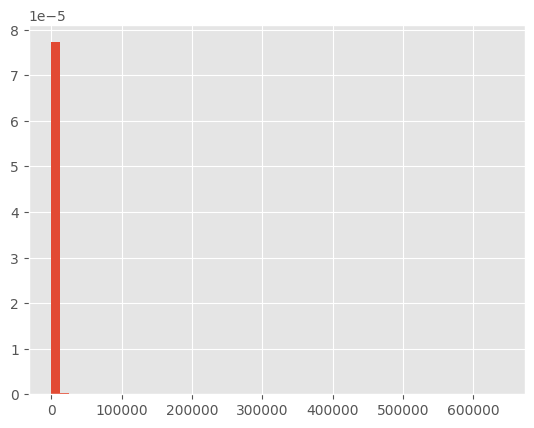

In [19]:
# длинный хвост - много выбросов
df['dislikeCount'].hist(bins=50, density=True);

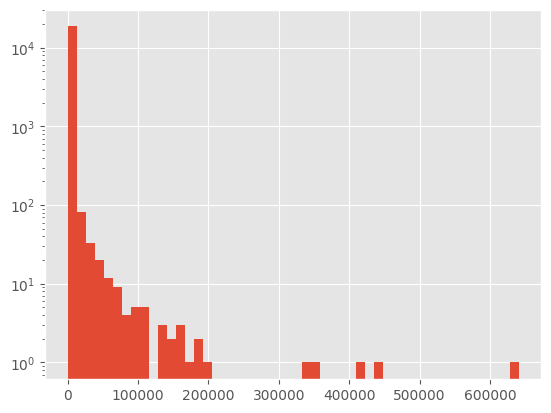

In [20]:
# лог шкала по оси Y для детального просмотра хвоста
df['dislikeCount'].hist(bins=50, log=True);

### Меры разброса
Дисперсия и стандартное отклонение

In [21]:
# сигма**2
df['dislikeCount'].var(ddof=0)

87226821.69238792

In [22]:
# s**2 - несмещенная дисперсия, деление на n-1
df['dislikeCount'].var(ddof=1)

87231449.35548371

In [23]:
df['dislikeCount'].std(ddof=0)

9339.530057363054

In [24]:
df['dislikeCount'].std(ddof=1)

9339.777800113005

In [25]:
# у 99% видео дизлайков меньше 12780
df['dislikeCount'].quantile(0.99)

12780.139999999978

In [26]:
# посчитаем для всех колонок
df.describe(include='all')

,title,caption,categoryId,commentCount,definition,description,dislikeCount,duration,license,licensedContent,...,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
count,19124,19124,19124.000000,18914.000000,19124,18339,18850.000000,19124,19124,19124,...,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000
unique,18029,2,NaN,NaN,2,14972,NaN,1594,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,False,NaN,NaN,hd,,NaN,PT3M37S,youtube,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,18877,NaN,NaN,14176,447,NaN,153,19075,15509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.984679,394.026065,NaN,NaN,745.344297,NaN,NaN,NaN,...,59.881883,9.412884,0.619141,0.462442,131.594608,27.230794,0.794017,0.101482,8.952899,11.293325
std,NaN,NaN,3.575677,4200.463284,NaN,NaN,9339.777800,NaN,NaN,NaN,...,69.148601,11.325384,0.098641,0.253029,333.584804,112.080512,6.829329,0.156571,37.887947,51.409051
min,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.059484,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,10.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,35.500000,5.574215,0.567248,0.333333,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,10.000000,5.000000,NaN,NaN,5.000000,NaN,NaN,NaN,...,50.000000,7.933333,0.615365,0.454545,13.000000,2.000000,0.090909,0.040276,0.000000,0.000000
75%,NaN,NaN,10.000000,35.000000,NaN,NaN,38.000000,NaN,NaN,NaN,...,67.234163,10.537179,0.669459,0.586207,61.000000,12.000000,0.628910,0.147194,2.000000,2.000000


In [27]:
# для числовых
df.describe()

,categoryId,commentCount,dislikeCount,likeCount,viewCount,comment_max_len_symbol,comment_max_len_word,comment_mean_len_symbol,comment_mean_len_word,comment_negative_mean_prob,comment_negative_share,commentators_uniq,comments_emoji_max,comments_emoji_mean,comments_emoji_share,comments_obscene_cnt,words_obscene_cnt
count,19124.000000,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000
mean,10.984679,394.026065,745.344297,5.735014e+03,8.436486e+05,487.842375,78.225028,59.881883,9.412884,0.619141,0.462442,131.594608,27.230794,0.794017,0.101482,8.952899,11.293325
std,3.575677,4200.463284,9339.777800,3.890303e+04,6.382348e+06,1258.715099,207.250529,69.148601,11.325384,0.098641,0.253029,333.584804,112.080512,6.829329,0.156571,37.887947,51.409051
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.059484,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,1.000000,1.800000e+01,1.915000e+03,75.000000,12.000000,35.500000,5.574215,0.567248,0.333333,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,5.000000,5.000000,1.000000e+02,1.135300e+04,183.000000,29.000000,50.000000,7.933333,0.615365,0.454545,13.000000,2.000000,0.090909,0.040276,0.000000,0.000000
75%,10.000000,35.000000,38.000000,6.367500e+02,8.180900e+04,491.000000,77.000000,67.234163,10.537179,0.669459,0.586207,61.000000,12.000000,0.628910,0.147194,2.000000,2.000000
max,29.000000,303077.000000,640698.000000,1.686810e+06,2.720477e+08,95844.000000,15974.000000,2472.000000,437.000000,0.968425,1.000000,3702.000000,3157.000000,546.000000,1.000000,693.000000,981.000000


In [28]:
# для категориальных
df.describe(include='object')

,title,definition,description,duration,license,music_style,performer,publishedAt,tags,video_id
count,19124,19124,18339,19124,19124,19124,19124,19124,17806,19124
unique,18029,2,14972,1594,2,7,111,17158,14661,19124
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,hd,,PT3M37S,youtube,rock,николаев,2018-03-26T12:48:20.000Z,"['Григорий', 'Натали', 'Водопад', 'Рюмка', 'во...",5gSMah-7zzQ
freq,11,14176,447,153,19075,5888,566,24,290,1


- `count` - число наблюдений
- `unique` - число уникальных значений
- `top` - мода
- `freq` - частота, с которой встречается мода

**Группировка**

In [29]:
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [30]:
df.groupby('music_style')[['dislikeCount', 'likeCount']].agg(['mean', 'median'])

dislikeCount            likeCount        
                    mean median          mean  median
music_style                                          
classic      1236.228956   18.0  28663.333333   536.0
estrada       173.565933    3.0    938.686662    47.0
indi          220.419307    2.0   2471.842299    37.0
popsa         790.161513   15.0   7492.273792   323.0
rap          4099.575383  154.0  26802.456253  2656.0
rock          287.698201    3.0   2132.887061    80.0
shanson        45.488327    1.0    440.390564    17.0

In [31]:
df.groupby('music_style', as_index=False).agg(dislikeCount_mean=('dislikeCount', 'mean'),
                                                likeCount_mean=('likeCount', 'mean'))

,music_style,dislikeCount_mean,likeCount_mean
0,classic,1236.228956,28663.333333
1,estrada,173.565933,938.686662
2,indi,220.419307,2471.842299
3,popsa,790.161513,7492.273792
4,rap,4099.575383,26802.456253
5,rock,287.698201,2132.887061
6,shanson,45.488327,440.390564


#### Apply
Хотим узнать длину названий видео - это можно сделать через apply, которая применяется к каждой ячейке колонки

In [32]:
df['title'].apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

In [33]:
# средняя длина названия видео
df['title'].apply(len).mean()

35.293871574984315

In [34]:
# создадим функцию, которая считает длину
def count_len(x):
    return len(x)

In [35]:
df['len_title'] = df['title'].apply(count_len)
df['len_title'].head(3)

0    25
1    41
2    75
Name: len_title, dtype: int64

In [36]:
# второй способ черех lambda
df['len_title_2'] = df['title'].apply(lambda x: count_len(x))
df['len_title_2'].head(3)

0    25
1    41
2    75
Name: len_title_2, dtype: int64

## Гистограммы

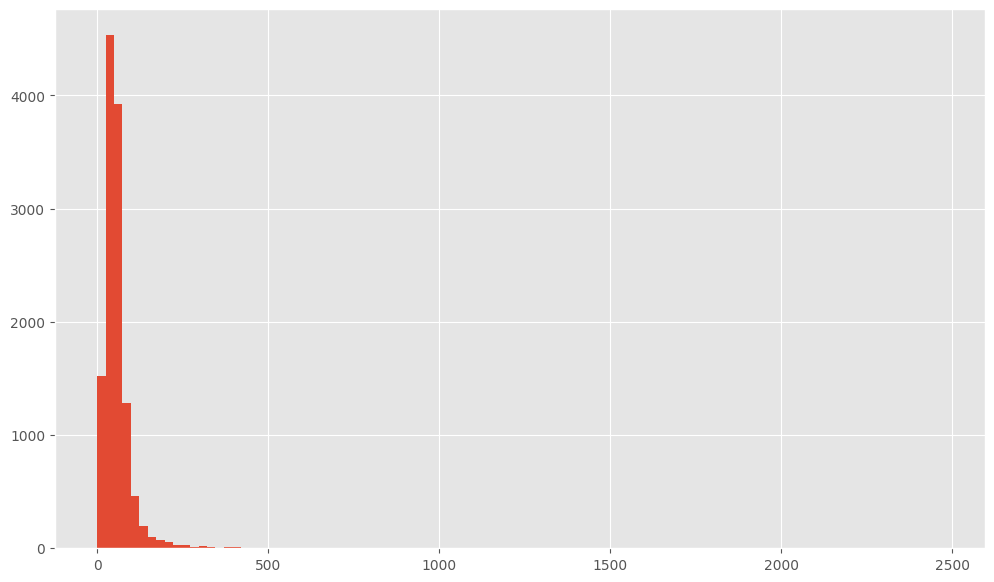

In [42]:
plt.figure(figsize=(12, 7))
plt.hist(df['comment_mean_len_symbol'], bins=100);

Text(0.5, 1.0, 'Распределение средней длины комментариев')

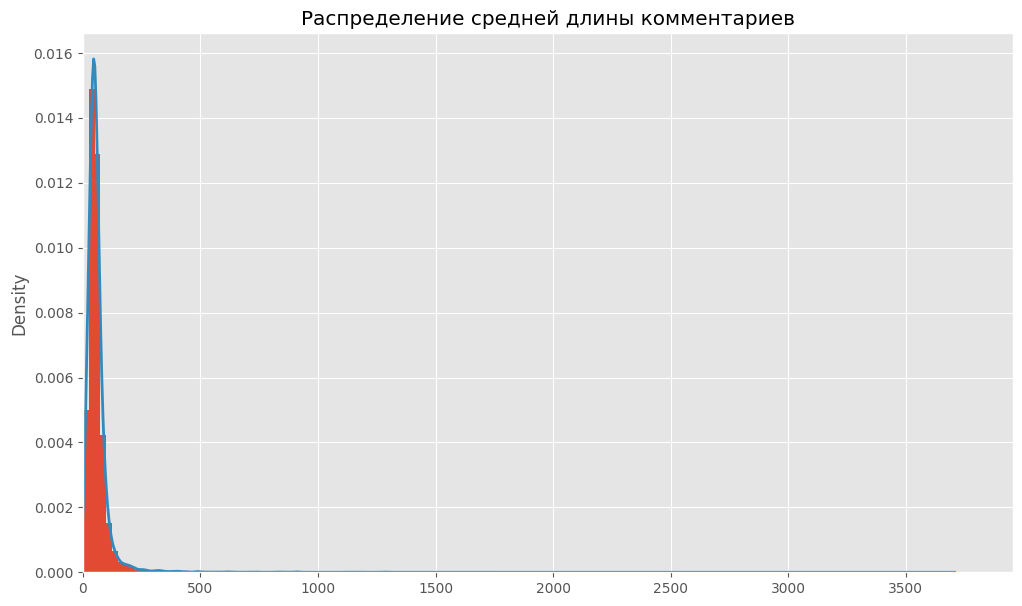

In [48]:
# сгладим через ядерную оценку плотности kde
plt.figure(figsize=(12, 7))

plt.hist(df['comment_mean_len_symbol'], bins=100, density=True)
df['comment_mean_len_symbol'].plot(kind='kde', lw=2)

plt.xlim(0) # зададим лимит оси X
plt.title('Распределение средней длины комментариев')

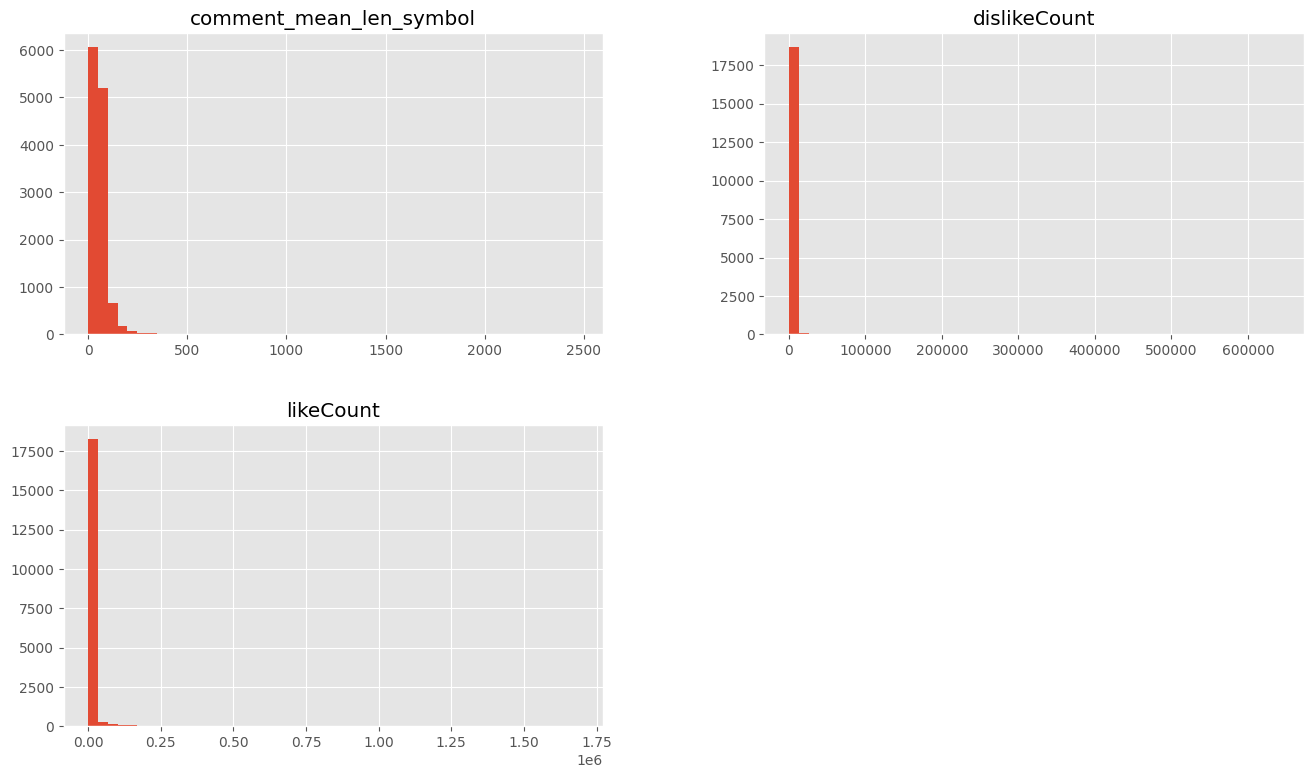

In [50]:
# построим несколько гистограмм
columns=['comment_mean_len_symbol', 'dislikeCount', 'likeCount']
df[columns].hist(bins=50, figsize=(16, 9));

Рассмотрим логарифмированные значения сначала по Y для детального рассмотрения хвоста, а затем логарифм по X для сглаживания хвостов. Чтобы не возникало ошибок, когда логарифмируем 0, надо к каждому значению прибавить константу.

Логарифмирование применяют часто в ML, чтобы алгоритм не переобучался на выбросах. Так же часто при поиске зависимостей, предсказаний данных реальная зависимость часто имеет вид не суммы факторов, а произведения или где-то степенной зависимости, что подразумевает логарфмирование.

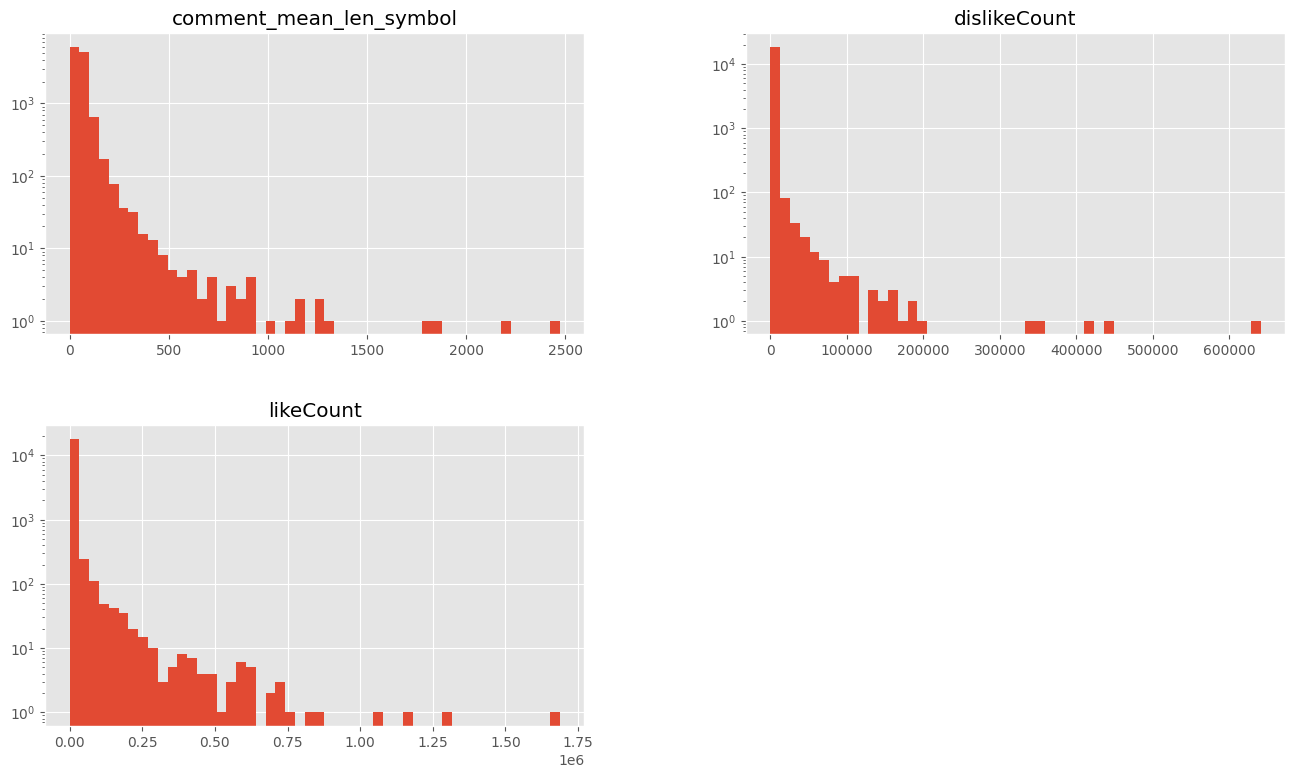

In [52]:
# по Y
columns=['comment_mean_len_symbol', 'dislikeCount', 'likeCount']
df[columns].hist(bins=50, figsize=(16, 9), log=True);

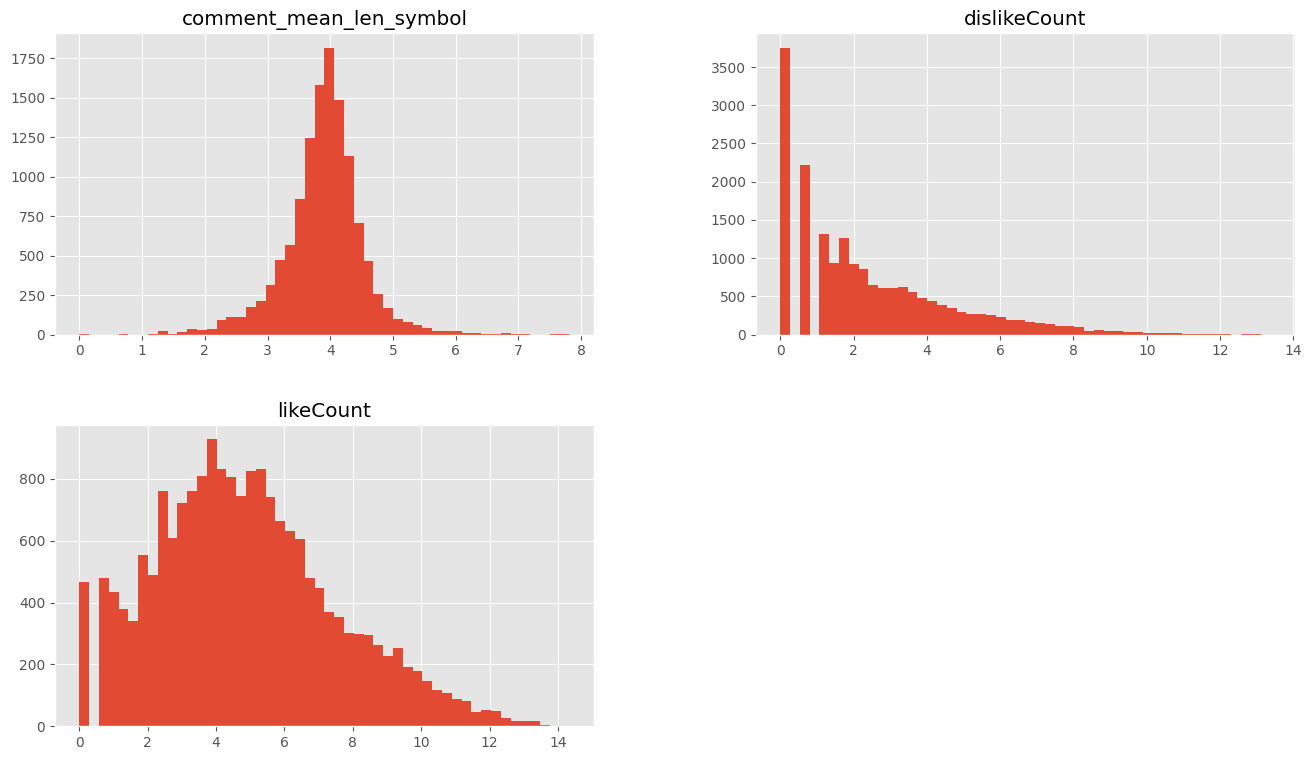

In [55]:
# по X
columns=['comment_mean_len_symbol', 'dislikeCount', 'likeCount']
df[columns].apply(lambda x: np.log(1 + x)).hist(bins=50, figsize=(16, 9));

### Ящик с усами и скрипичный график
Скрипичный график – это сочетание диаграммы размаха и графика плотности, развернутых и расположенных по обе стороны для отображения формы распределения данных.

Черный ящик внутри скрипки - межквартильный размах

In [60]:
# для наглядности прологарифмируем
df_log = df[columns].apply(lambda x: (np.log(x+1)))
df_log['music_style'] = df['music_style']

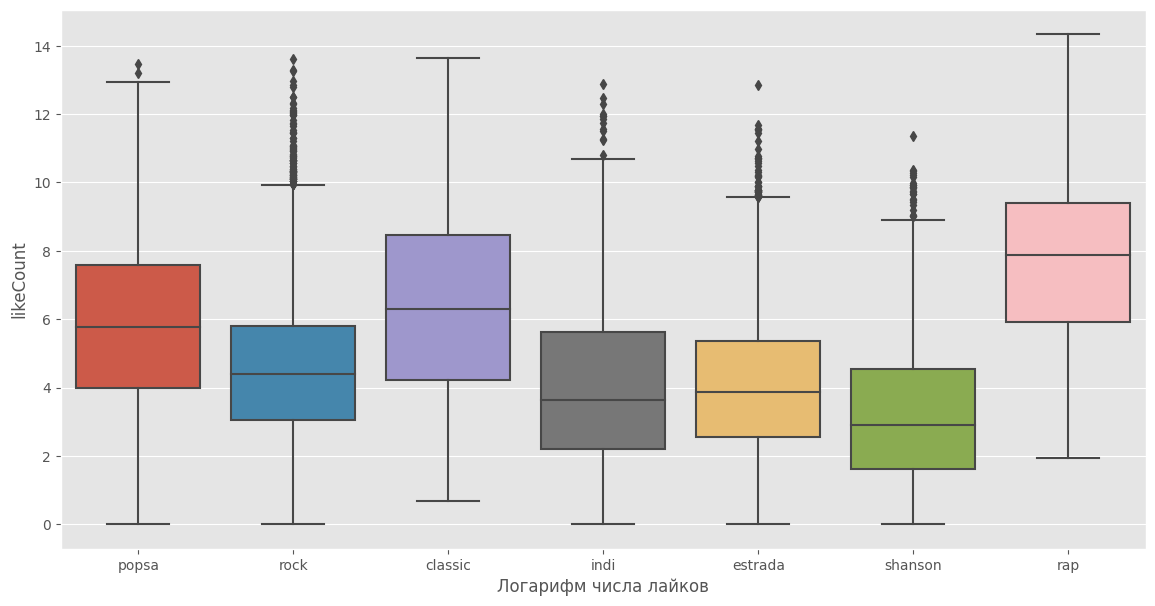

In [63]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='music_style', y='likeCount', data=df_log)

plt.xlabel('Музыкальный стиль')
plt.xlabel('Логарифм числа лайков');

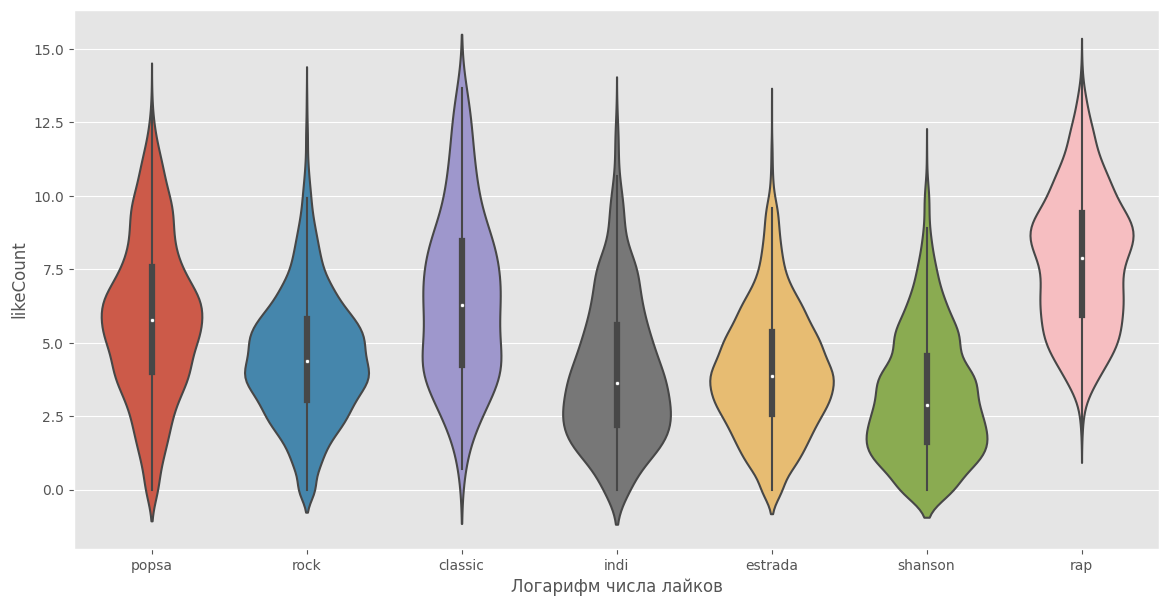

In [66]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='music_style', y='likeCount', data=df_log)

plt.xlabel('Музыкальный стиль')
plt.xlabel('Логарифм числа лайков');

In [72]:
# найдем всех уникальных исполнителей
df['performer'].unique()

array(['2маши', 'лазарев', 'мумий_тролль', 'нюша', 'classical_channel',
       'антоха_мс', 'николаев', 'виа_гра', 'король_и_шут', 'валерия',
       'кукрыниксы', 'михаил_круг', 'ария', 'ирина_круг', 'барских',
       'арбенина', 'воровайки', 'газманов',
       'краснознаменная_дивизия_имени_моей_бабушки', 'чичерина', 'ваенга',
       'би_2', 'звери', 'ногу_свело', 'киркоров', 'louna',
       'несчастный_случай', 'тараканы', 'тимати', 'gazgolder', 'noizemc',
       'темникова', 'крид', 'караулова', 'земфира', 'михайлов', 'кока',
       'руки_вверх', 'miyagi&эндшпиль', 'план ломоносова', 'шуфутинский',
       'ленинград', 'rsac', 'astudio', 'pharaon', 'наив', 'serebro',
       'элджей', 'смысловые_галлюцинации', 'cбпч', 'ддт', 'электрофорез',
       'женя_любич', 'пасош', 'пугачёва', 'гребенщиков', 'loboda',
       'feduk', 'lone', 'oxxxymiron', 'сектор_газа', 'бузова',
       'казускома', 'мальбэк', 'буерак', 'pompeya', 'басков', 'леонтьев',
       'буйнов', 'retuses', 'летов', 'гражда

In [73]:
df['performer'].nunique()

111

In [75]:
df['performer'].unique().shape # или .size

(111,)

In [77]:
# выведем топ 3 исполнителя по числу клипов
df['performer'].value_counts().head(3)

performer
николаев    566
валерия     525
михайлов    516
Name: count, dtype: int64

In [78]:
df['performer'].value_counts()[:3]

performer
николаев    566
валерия     525
михайлов    516
Name: count, dtype: int64

In [79]:
df['performer'].value_counts()[:3].values

array([566, 525, 516], dtype=int64)

In [80]:
# в дальнейшем можно обернуть в list
df['performer'].value_counts()[:3].index

Index(['николаев', 'валерия', 'михайлов'], dtype='object', name='performer')

In [86]:
# найти долю клипов с рэпом
(df['music_style'] == 'rap').mean()

0.10604476051035348

In [88]:
# доля на разные жанры
df['music_style'].value_counts() / len(df)

music_style
rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: count, dtype: float64

In [89]:
df['music_style'].value_counts(normalize=True)

music_style
rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: proportion, dtype: float64

In [102]:
# сколько исполнителей пишут музыку в разных жанрах?
df.groupby('performer', as_index=False)['music_style'] \
    .agg(['nunique'])\
    .query('nunique > 1')['nunique'].sum()

0

In [106]:
# сколько в среднем просмтров у видео с числом лайков > 100 000 и уникальных комментаторов > 50?
(df['likeCount'] > 100000)&(df['commentators_uniq'] > 50)
# в результате объединения множеств получаем True или False

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121    False
19122    False
19123    False
Length: 19124, dtype: bool

In [108]:
# найдем среднее число просмотров
df[(df['likeCount'] > 100000)&(df['commentators_uniq'] > 50)]['viewCount'].mean()

39326558.901869155

In [115]:
# на1дем 5% самых поппулярных исполнителей. Самые попоулярные:
# - число лайков более 100 000 (суммарно)
# - наибольшая разница между медианным числом лайков и дизлайков
df_ = df.groupby('performer', as_index=False)['likeCount'].agg('sum')

In [118]:
top_perfs = df_[df_['likeCount'] > 100000]['performer'].to_list()

In [122]:
df_top = df.query('performer in @top_perfs')\
    .groupby('performer', as_index=False)\
    .agg({'likeCount': 'median',
        'dislikeCount': 'median'})
df_top.head()

,performer,likeCount,dislikeCount
0,2маши,243.0,9.0
1,astudio,68.0,3.0
2,classical_channel,536.0,18.0
3,face,9844.0,953.0
4,feduk,1272.0,46.0


In [124]:
df_top['diff'] = df_top['likeCount'] - df_top['dislikeCount']
q = df_top['diff'].quantile(0.95)
df_top[df_top['diff'] > q].sort_values('diff')

,performer,likeCount,dislikeCount,diff
14,oxxxymiron,15489.0,612.5,14876.5
40,кока,16532.0,289.0,16243.0
59,пошлая_молли,21104.0,1274.0,19830.0
65,хаски,67933.0,3822.0,64111.0


Важно не только смотреть на статистики, но и строить графики по данным. Разные данные могут иметь одинаковые или близкие статистики, но чтобы лучше понять природу данных и сделать соотвествующие выводы, важно их виализировать.